# k-means clustering Happiness at work 

Code Created by Luis Enrique Acevedo Galicia

Date: 2019-11-02


Here, I present a simple and easy way to create a k-menas cluster. The file Work_happiness.csv contains data of happines of worker during performing their jobs and the loyalty to the employer.

# The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

# The data 

In [2]:
data = pd.read_csv('Work_happiness.csv')
data.head()

,Happiness at work,Loyalty to job
0,4,-1.7556
1,6,-0.3696
2,5,-1.3068
3,7,-0.3828
4,4,1.3992


Verifying that data is completed

In [3]:
data[pd.isnull(data['Loyalty to job'])]

,Happiness at work,Loyalty to job


learning about this data set

In [4]:
data.describe()

,Happiness at work,Loyalty to job
count,30.000000,30.000000
mean,6.400000,0.001320
std,2.620871,1.341748
min,1.000000,-2.230800
25%,4.250000,-1.277100
50%,7.000000,0.198000
75%,8.750000,1.250700
max,10.000000,1.821600


Text(0, 0.5, 'Loyalty to job')

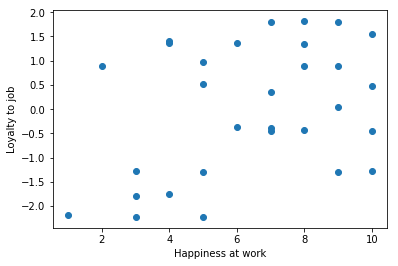

In [5]:
# Plotting the data
plt.scatter(data['Happiness at work'],data['Loyalty to job'])
plt.xlabel('Happiness at work')
plt.ylabel('Loyalty to job')

# Cluestering

In [6]:
#Copy of the original data
X_clt=data.copy()
#Sacaling inputs
X_clt = preprocessing.scale(X_clt)
print(X_clt)



[[-0.93138063 -1.3318111 ]
 [-0.15523011 -0.28117124]
 [-0.54330537 -0.99160391]
 [ 0.23284516 -0.29117733]
 [-0.93138063  1.05964534]
 [-2.09560642 -1.6620122 ]
 [ 1.39707095 -0.97159172]
 [ 0.62092042 -0.32119561]
 [ 0.62092042  1.01962097]
 [ 0.62092042  0.67941378]
 [ 1.39707095 -0.3412078 ]
 [-0.54330537  0.38923705]
 [-0.54330537 -1.69203048]
 [-1.70753116  0.66940768]
 [ 0.23284516  0.26916393]
 [ 1.00899568  1.35982816]
 [ 0.62092042  1.37984035]
 [ 0.23284516  1.35982816]
 [ 0.23284516 -0.3412078 ]
 [ 1.00899568  0.66940768]
 [ 1.39707095  1.17971847]
 [-1.31945589 -1.69203048]
 [-0.93138063  1.03963316]
 [-1.31945589 -0.96158562]
 [-0.15523011  1.02962706]
 [ 1.00899568 -0.99160391]
 [ 1.39707095  0.36922486]
 [ 1.00899568  0.02901767]
 [-1.31945589 -1.36182938]
 [-0.54330537  0.72944425]]


/home/bwayne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


Text(0, 0.5, 'WCSS (within-cluster sums of squares)')

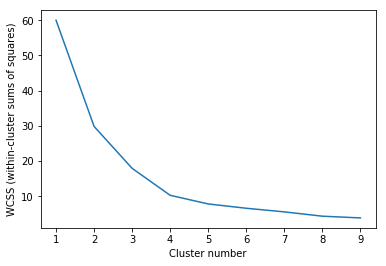

In [8]:
# find the optimal WCSS (within-cluster sums of squares) 
WCSS = []
#find the best cluster
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(X_clt)
    WCSS.append(kmeans.inertia_)

#plot results

plt.plot(range(1,10),WCSS)
plt.xlabel('Cluster number')
plt.ylabel('WCSS (within-cluster sums of squares)')

In [11]:
kmeans_elbow = KMeans(4)
kmeans_elbow.fit(X_clt)
#Analize the cluster

CLT = data.copy()
CLT['Cluster prediction'] = kmeans_elbow.fit_predict(X_clt)
CLT



,Happiness at work,Loyalty to job,Cluster prediction
0,4,-1.7556,2
1,6,-0.3696,0
2,5,-1.3068,2
3,7,-0.3828,0
4,4,1.3992,3
5,1,-2.1912,2
6,10,-1.2804,0
7,8,-0.4224,0
8,8,1.3464,1
9,8,0.8976,1


Text(0, 0.5, 'Loyalty')

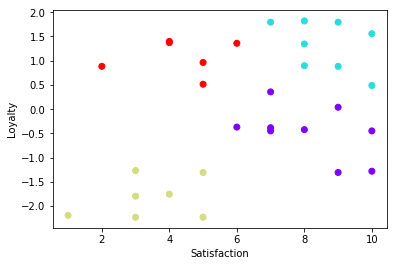

In [14]:
#Plot results
plt.scatter(CLT['Happiness at work'],CLT['Loyalty to job'],c=CLT['Cluster prediction'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')